In [87]:
import pandas as pd
import numpy as np
import evaluate as evl
import os
import joblib

In [176]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
#plt.style.available

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
taxa_models = [f for f in os.listdir() if f.endswith('.joblib')]

In [91]:
python_df = pd.read_csv('../data/PYTHON.csv')
AmGator_df = pd.read_csv('../data/ALLIGATOR.csv')

In [92]:
python_models = [f for f in taxa_models if f.find('Python') != -1 and f.find('SMOTE') == -1]
amGator_models = [f for f in taxa_models if f.find('amGator') != -1 and f.find('SMOTE') == -1]

In [150]:
results = {}
for group in [python_models, amGator_models]:
    for model in group:
        pipe = joblib.load(model)
        if model.find('_I_') != -1:
            scores = evl.subgroup_eval_all(python_df, 'I', pipe, model)
        else:
            scores = evl.subgroup_eval_all(python_df, 'E', pipe, model)

        results[model] = scores

Python_I_dt_pipe.joblib recall score on I holdout: 0.75
Python_I_rf_pipe.joblib recall score on I holdout: 0.6793478260869565
Python_E_dt_pipe.joblib recall score on E holdout: 0.2
Python_I_gbc_pipe.joblib recall score on I holdout: 0.5760869565217391
Python_I_xgb_pipe.joblib recall score on I holdout: 0.44021739130434784
Python_E_rf_pipe.joblib recall score on E holdout: 0.6
Python_E_lr_pipe.joblib recall score on E holdout: 0.7
Python_E_xgb_pipe.joblib recall score on E holdout: 0.2
Python_I_lr_pipe.joblib recall score on I holdout: 0.7445652173913043
Python_E_gbc_pipe.joblib recall score on E holdout: 1.0
amGator_I_gbc_pipe.joblib recall score on I holdout: 0.9239130434782609
amGator_I_dt_pipe.joblib recall score on I holdout: 0.9021739130434783
amGator_I_xgb_pipe.joblib recall score on I holdout: 0.532608695652174
amGator_I_rf_pipe.joblib recall score on I holdout: 0.9782608695652174
amGator_E_dt_pipe.joblib recall score on E holdout: 0.3
amGator_E_rf_pipe.joblib recall score on E 

In [160]:
def get_chart_df(results_dict):
    col = ['file','recall', 'fscore', 'precision', 'auroc', 'avg_precision']
    df = pd.DataFrame(results_dict).T.sort_index()
    df.reset_index(inplace=True)
    df.columns = col
    
    df['taxa'] = df.file.str.split('_').str[0]
    df['trade_type'] = df.file.str.split('_').str[1]
    df['model'] = df.file.str.split('_').str[2]
    df.drop(columns='file', inplace=True)
    
    return df.round(2)

In [215]:
chart_df = get_chart_df(results)
chart_df.to_csv('scores_table.csv')

In [182]:
chart_df.loc[(chart_df.taxa=='Python')&(chart_df.trade_type=='I')]

,recall,fscore,precision,auroc,avg_precision,taxa,trade_type,model
5,0.75,0.16,0.09,0.85,0.46,Python,I,dt
6,0.58,0.05,0.02,0.50,0.02,Python,I,gbc
7,0.74,0.18,0.10,0.87,0.54,Python,I,lr
8,0.68,0.27,0.17,0.88,0.55,Python,I,rf
9,0.44,0.58,0.86,0.82,0.51,Python,I,xgb


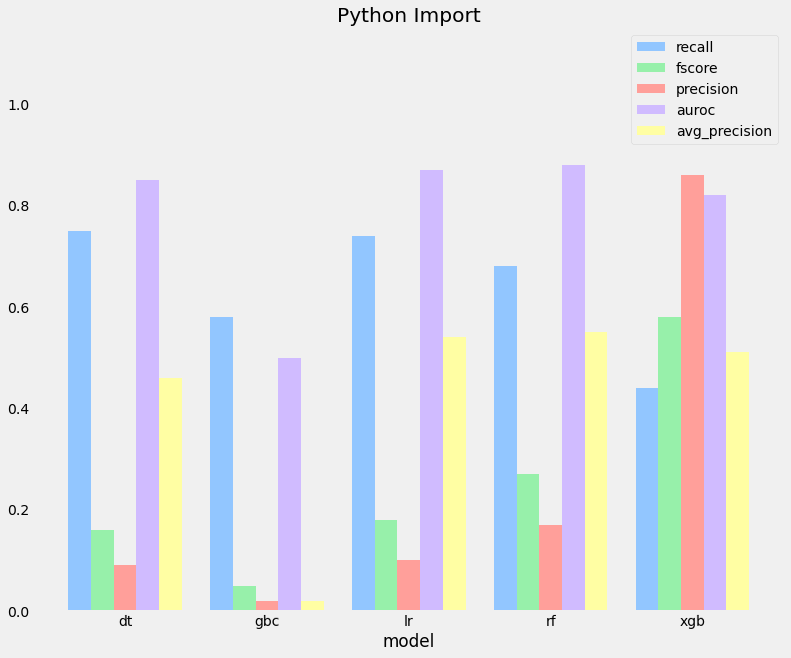

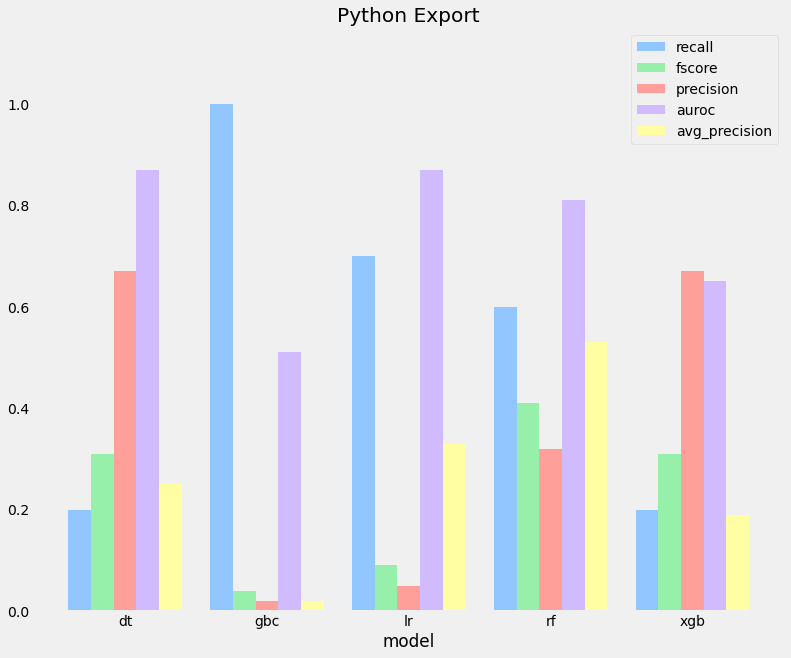

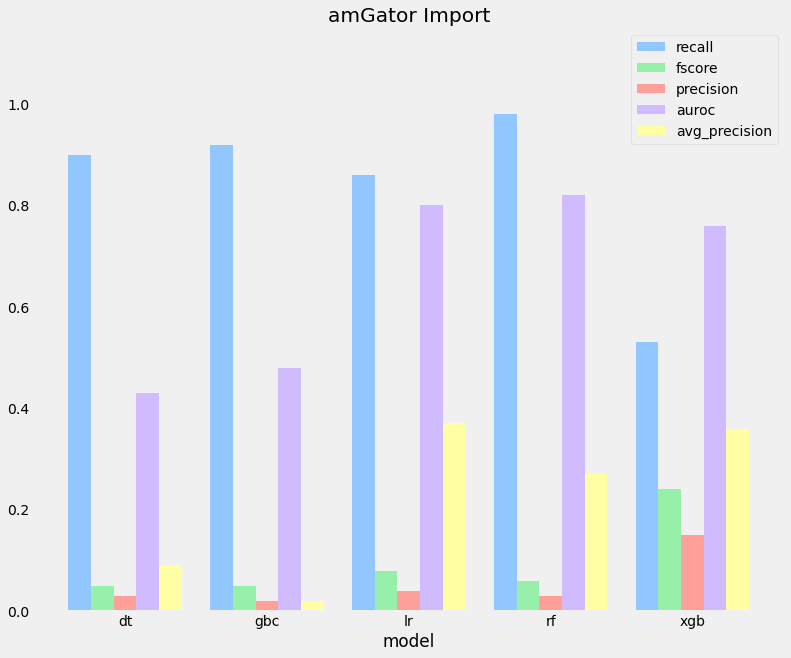

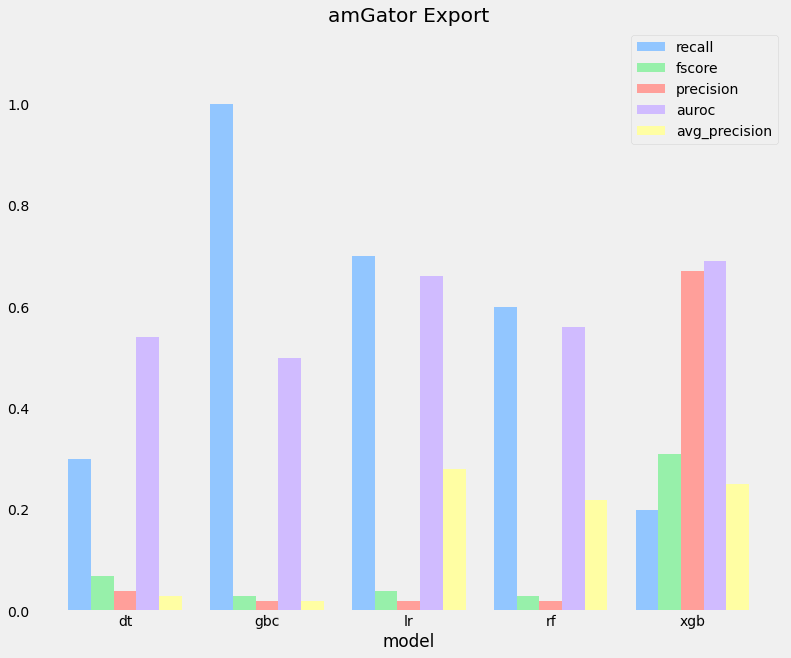

In [214]:
def get_charts(df):
    taxa = ['Python', 'amGator']
    trade_type = ['I', 'E']
    for t in taxa:
        for way in trade_type:
            mask = (df.taxa == t) & (df.trade_type == way)
            
            name = f'{t} Import' if way == 'I' else f'{t} Export'
            
            sub_df = df.loc[mask].set_index('model').iloc[:,:5]
            sub_df.plot(kind='bar', 
                        grid=False,
                        rot=0.5,
                        width=0.8,
                        figsize=(12, 10),
                        title=name,
                        ylim=[0,1.15],
                        legend='right',
                        layout='constrained'
                   )
            plt.legend(loc='best')
            plt.savefig(f'./visualizations/{name}.png')
            plt.show()

get_charts(chart_df)